<a href="https://colab.research.google.com/github/ddah0329/3th_OUTTA_AI_BootCamp/blob/main/%EC%9D%B4%EC%BB%A4%EB%A8%B8%EC%8A%A4_%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C_%ED%81%AC%EB%A1%A4%EB%A7%81(%EB%A7%81%ED%81%AC%EA%B8%B0%EC%A4%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 페이지 번호 범위 설정 (1부터 3까지)
page_range = range(1, 4)

# 기본 URL (pageIdx 부분만 동적으로 변경)
base_url = "https://www.oliveyoung.co.kr/store/display/getMCategoryList.do?dispCatNo=1000001000100150001&fltDispCatNo=&prdSort=01&pageIdx={}&rowsPerPage=36&searchTypeSort=btn_thumb&plusButtonFlag=N&isLoginCnt=0&aShowCnt=0&bShowCnt=0&cShowCnt=0&trackingCd=Cat1000001000100150001_Small&amplitudePageGubun=&t_page=&t_click=&midCategory=%ED%81%AC%EB%A6%BC&smallCategory=%EC%86%8C_%ED%81%AC%EB%A6%BC&checkBrnds=&lastChkBrnd="

# 결과 저장할 리스트
results = []

# 각 페이지의 데이터를 크롤링하는 함수 (상품 URL 수집)
def crawl_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # 'prd_info' 클래스에 해당하는 div 내부에서 a 태그 추출하여 상품 URL 가져오기
    product_infos = soup.select('.prd_info')

    for product in product_infos:
        # 상품 링크 추출 (href 속성)
        link_tag = product.select_one('a')
        product_link = link_tag['href'] if link_tag else None

        # 추출한 URL을 results 리스트에 추가
        if product_link:
            results.append({"url": product_link})

# 상품별 상세 페이지에서 브랜드명, 제품명, 별점, 리뷰 수를 가져오는 함수
def get_review_data(product_url):
    response = requests.get(product_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # 브랜드명 추출
    brand_name = soup.select_one('p.prd_brand a').get_text(strip=True) if soup.select_one('p.prd_brand a') else "N/A"

    # 제품명 추출
    product_name = soup.select_one('.prd_name').get_text(strip=True) if soup.select_one('.prd_name') else "N/A"

    # 별점과 리뷰 수 추출
    review_grade = soup.select_one('p#repReview b').get_text(strip=True) if soup.select_one('p#repReview b') else "N/A"
    review_count = soup.select_one('p#repReview em').get_text(strip=True) if soup.select_one('p#repReview em') else "N/A"

    return brand_name, product_name, review_grade, review_count

# 각 페이지를 순회하며 상품 URL 크롤링
for page in page_range:
    crawl_page(base_url.format(page))

# 수집된 각 상품의 URL을 통해 브랜드명, 제품명, 리뷰 데이터를 가져오기
for result in results:
    brand_name, product_name, review_grade, review_count = get_review_data(result['url'])
    result['brand_name'] = brand_name
    result['product_name'] = product_name
    result['review_grade'] = review_grade
    result['review_count'] = review_count

# 결과를 데이터프레임으로 변환하여 출력
df = pd.DataFrame(results)
print(df)


                                                   url brand_name  \
0    https://www.oliveyoung.co.kr/store/goods/getGo...        케어존   
1    https://www.oliveyoung.co.kr/store/goods/getGo...      메이크프렘   
2    https://www.oliveyoung.co.kr/store/goods/getGo...        닥터지   
3    https://www.oliveyoung.co.kr/store/goods/getGo...        토리든   
4    https://www.oliveyoung.co.kr/store/goods/getGo...      에스네이처   
..                                                 ...        ...   
103  https://www.oliveyoung.co.kr/store/goods/getGo...       셀퓨전씨   
104  https://www.oliveyoung.co.kr/store/goods/getGo...       셀퓨전씨   
105  https://www.oliveyoung.co.kr/store/goods/getGo...        메디필   
106  https://www.oliveyoung.co.kr/store/goods/getGo...       유리아쥬   
107  https://www.oliveyoung.co.kr/store/goods/getGo...     닥터디퍼런트   

                                          product_name review_grade  \
0           [8/22 하루특가] 케어존 리큐어 노르데나우 시카 크림 60ml 더블 기획          4.7   
1    [8월 올영픽/크림31ml 추가증정] 메이크

In [8]:
# CSV 파일로 저장
df.to_csv('oliveyoung_products_data.csv', index=False, encoding='utf-8-sig')

# 크롤링한 상품의 총 개수 출력
print(f"\n전체상품 : {len(results)}")


전체상품 : 108


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<ipython-input-10-3e2938e3f20f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ratings_float, palette="Blues")


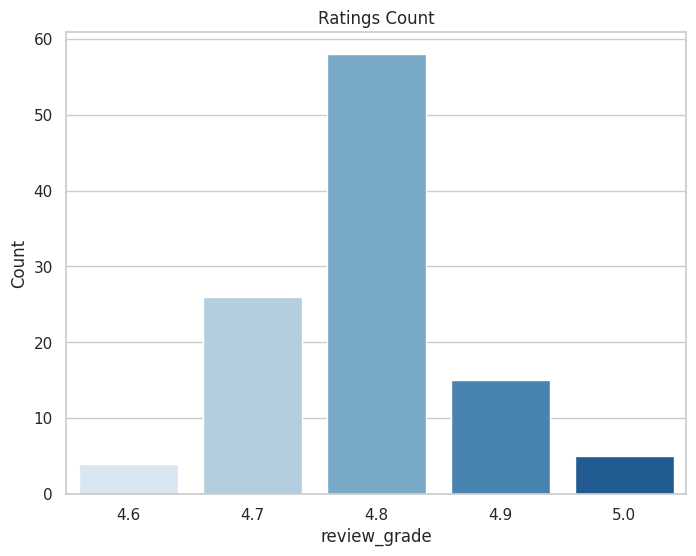

In [10]:
# 'rating' 데이터를 리스트로 묶음
ratings = [item['review_grade'] for item in results if item['review_grade'] != "N/A"]

# 문자열을 실수로 변환
ratings_float = [float(r) for r in ratings]

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 별점별 빈도수
plt.figure(figsize=(8, 6))
sns.countplot(x=ratings_float, palette="Blues")
plt.title('Ratings Count')
plt.xlabel('review_grade')
plt.ylabel('Count')
plt.show()